# Previsão do preço médio de imóveis 

## Bibliotecas

In [1]:
# Importando bibiliotecas que serão utilizadas durante todo o projeto
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import pickle

#import matplotlib.pyplot as plt
#%matplotlib inline

In [2]:
#importando uma biblioteca para retirar os avisos(warning)
import warnings
warnings.filterwarnings('ignore') # ou warnings.filterwarnings(action='once')

#Cuidado ao usar essa biblioteca, alguns avisos são importantes.

# Projeto
O objetivo nesse projeto é criar um modelo de machine learning, utilizando a técnica de Regressão Linear, que faça previsões sobre os preços de imóveis a partir de um conjunto de características conhecidas dos imóveis.

# Dados presentes no dataset
 - precos - Preços do imóveis
 - area - Área do imóvel
 - garagem - Número de vagas de garagem
 - banheiros - Número de banheiros
 - lareira - Número de lareiras
 - marmore - Se o imóvel possui acabamento em mármore branco (1) ou não (0)
 - andares - Se o imóvel possui mais de um andar (1) ou não (0)


In [3]:
#Fazendo a leitura do dataset
dados =  pd.read_csv('dados/HousePrices_HalfMil.csv', sep = ';')
dados

,precos,area,garagem,banheiros,lareira,marmore,andares
0,51875,25,3,4,3,0,1
1,17875,35,1,3,1,0,0
2,47075,195,2,4,2,0,0
3,38575,33,2,2,1,0,1
4,33775,11,2,3,0,0,1
...,...,...,...,...,...,...,...
995,29150,48,1,5,4,0,0
996,43550,112,2,2,3,0,1
997,56575,185,3,4,4,0,1
998,56075,185,2,3,1,0,1


In [4]:
#verificando o tamanho do dataset
dados.shape

(1000, 7)

# Análises Preliminares
Análise descritiva

In [5]:
dados.describe().round(2)

,precos,area,garagem,banheiros,lareira,marmore,andares
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,41985.60,124.33,2.01,3.00,2.03,0.33,0.48
std,12140.39,72.39,0.81,1.43,1.42,0.47,0.50
min,13150.00,1.00,1.00,1.00,0.00,0.00,0.00
25%,33112.50,60.75,1.00,2.00,1.00,0.00,0.00
50%,41725.00,123.00,2.00,3.00,2.00,0.00,0.00
75%,51175.00,187.00,3.00,4.00,3.00,1.00,1.00
max,73675.00,249.00,3.00,5.00,4.00,1.00,1.00


In [6]:
#Estou utilizando o coeficiente de correlação para encontrar a associação linear entre as variáveis, onde 
#entre -1 e +1 sendo que -1 indica associação negativa perfeita e +1 indica associação positiva perfeita.
dados.corr().round(2)

,precos,area,garagem,banheiros,lareira,marmore,andares
precos,1.00,0.12,0.10,0.12,0.11,0.43,0.63
area,0.12,1.00,-0.01,-0.01,0.01,-0.02,-0.02
garagem,0.10,-0.01,1.00,0.07,0.06,-0.02,-0.02
banheiros,0.12,-0.01,0.07,1.00,0.05,-0.03,-0.02
lareira,0.11,0.01,0.06,0.05,1.00,0.03,-0.00
marmore,0.43,-0.02,-0.02,-0.03,0.03,1.00,-0.01
andares,0.63,-0.02,-0.02,-0.02,-0.00,-0.01,1.00


# Análise Gráfica dos dados

In [7]:
#colinha para escolher as cores e estilo do gráfic

#palette -> Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2
# style -> white, dark, whitegrid, darkgrid, ticks

In [8]:
sns.set_palette("Accent")
sns.set_style("darkgrid")

#### Estou usando o boxplot para avaliar o comportamento da distruibuição da variavél dependente, verificando se existe valores discrepantes(outliers) e o boxplot apresenta algumas tendência. 

<AxesSubplot:title={'center':'Preços dos Imóveis R$'}, ylabel='R$'>

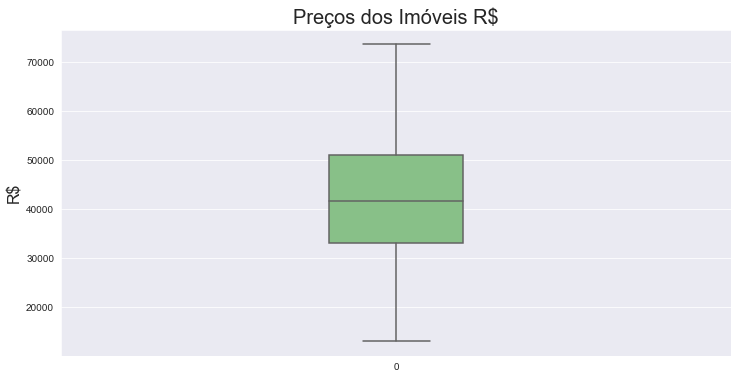

In [9]:
ax = sns.boxplot(data = dados['precos'], orient = 'v', width = 0.2)
ax.figure.set_size_inches(12, 6)
ax.set_title('Preços dos Imóveis R$', fontsize = 20)
ax.set_ylabel('R$', fontsize = 16)
ax


#### Investigando mais a variavél dependente (y) juntamento com as outras caracteristicas, irei fazer um box plot da variável dependente em conjunto com cada variável explicativa (somente as categóricas).

#### Preço x Garagem

<AxesSubplot:title={'center':'Preços dos imóveis'}, xlabel='Número de Vagas de Garagem', ylabel='R$'>

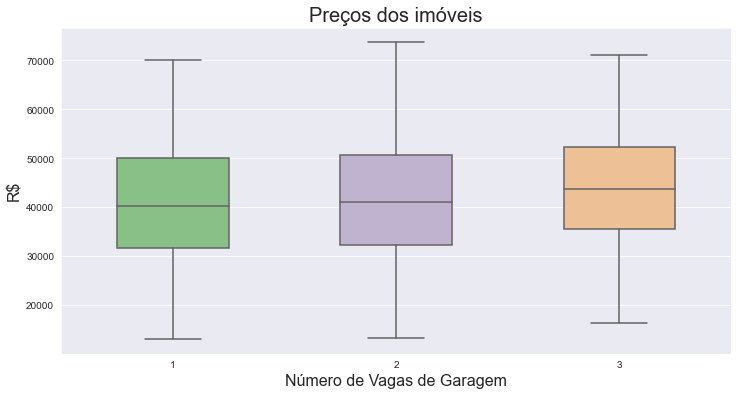

In [10]:
ax = sns.boxplot(y = 'precos', x = 'garagem' , data = dados, orient = 'v', width = 0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Preços dos imóveis', fontsize = 20)
ax.set_xlabel('Número de Vagas de Garagem', fontsize = 16)
ax.set_ylabel('R$', fontsize = 16)
ax

#### Preço x Banheiro

<AxesSubplot:title={'center':'Preços dos imóveis'}, xlabel='Número de Banheiros', ylabel='R$'>

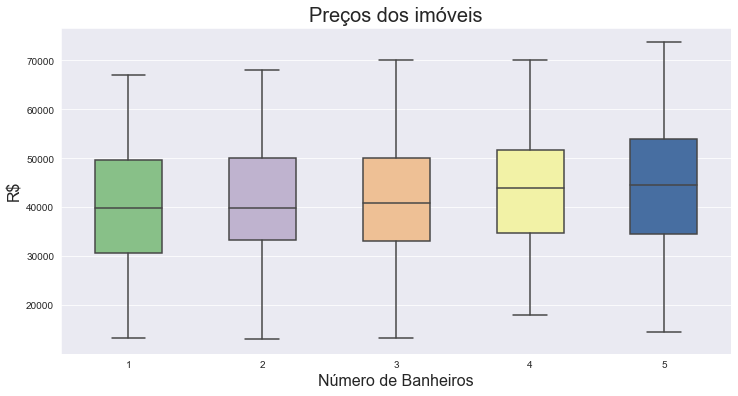

In [11]:
ax = sns.boxplot(y = 'precos', x = 'banheiros' , data = dados, orient = 'v', width = 0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Preços dos imóveis', fontsize = 20)
ax.set_xlabel('Número de Banheiros', fontsize = 16)
ax.set_ylabel('R$', fontsize = 16)
ax

#### Preço x lareira

<AxesSubplot:title={'center':'Preços dos imóveis'}, xlabel='Número de Lareiras', ylabel='R$'>

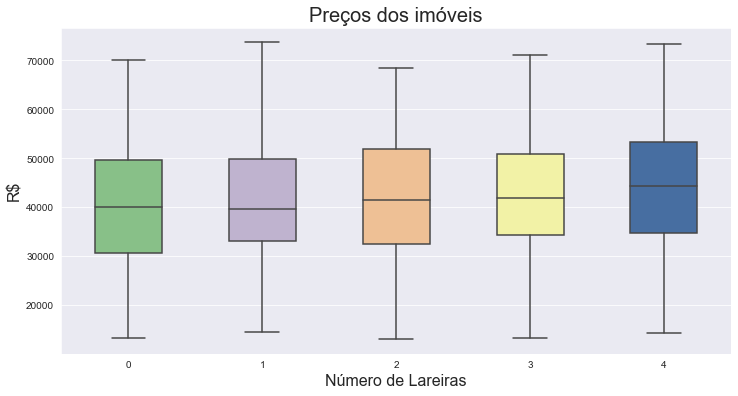

In [12]:
ax = sns.boxplot(y = 'precos', x = 'lareira' , data = dados, orient = 'v', width = 0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Preços dos imóveis', fontsize = 20)
ax.set_xlabel('Número de Lareiras', fontsize = 16)
ax.set_ylabel('R$', fontsize = 16)
ax

#### Preço x Acabamento em Mármore

<AxesSubplot:title={'center':'Preços dos imóveis'}, xlabel='Acabamento em Mármore', ylabel='R$'>

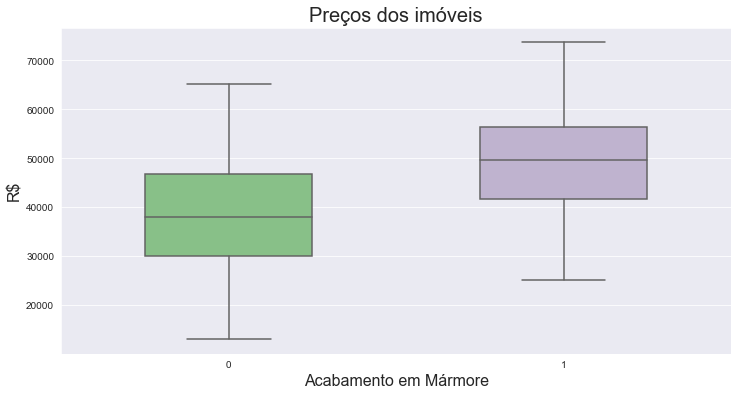

In [13]:
ax = sns.boxplot(y = 'precos', x = 'marmore' , data = dados, orient = 'v', width = 0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Preços dos imóveis', fontsize = 20)
ax.set_xlabel('Acabamento em Mármore', fontsize = 16)
ax.set_ylabel('R$', fontsize = 16)
ax

#### Preço x Andares

<AxesSubplot:title={'center':'Preços dos imóveis'}, xlabel='Mais de um Andar', ylabel='R$'>

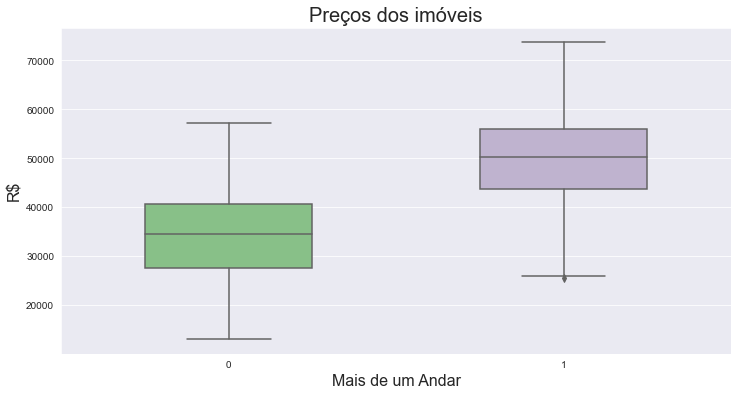

In [14]:
ax = sns.boxplot(y = 'precos', x = 'andares' , data = dados, orient = 'v', width = 0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Preços dos imóveis', fontsize = 20)
ax.set_xlabel('Mais de um Andar', fontsize = 16)
ax.set_ylabel('R$', fontsize = 16)
ax

#### Fiz a utilização do histograma para avaliar a distribuição de frequências da variável dependente parece ser assimétrica e é possível supor que a variável dependente segue uma distribuição normal.

<AxesSubplot:title={'center':'Distruição de Frequência - Preços'}, xlabel='precos', ylabel='Frequência'>

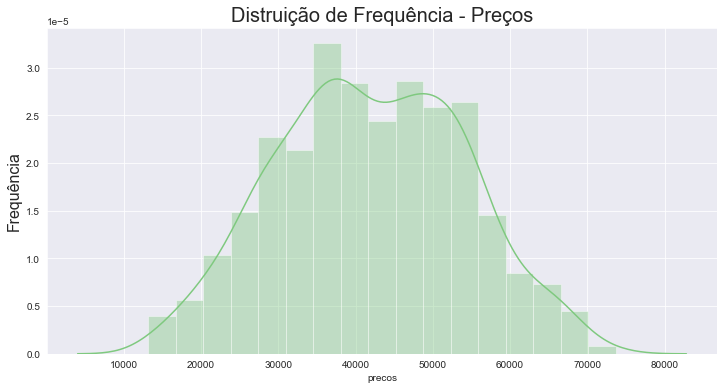

In [15]:
ax = sns.distplot(dados['precos'])
ax.figure.set_size_inches(12,6)
ax.set_title('Distruição de Frequência - Preços', fontsize = 20)
ax.set_ylabel('Frequência', fontsize = 16)
ax

#### Plotei gráficos de dispersão da variável dependente contra cada variável explicativa. Utilize o pairplot da biblioteca seaborn para isso.

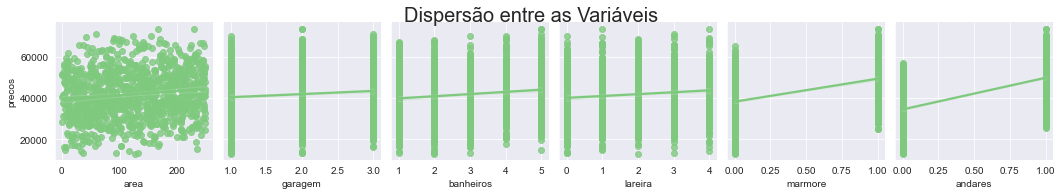

In [16]:
# Apliquei especificação kind = 'reg' traça uma reta de regressão
ax = sns.pairplot(dados, y_vars = 'precos', x_vars = ['area', 'garagem', 'banheiros', 'lareira', 'marmore', 'andares'], kind = 'reg' )
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

# Estimando um modelo de regressão Linear

### Criando uma Series (pandas) para armazenar a variável dependente (y) e explicativas (X)

In [17]:
y = dados['precos']

In [18]:
X = dados[['area', 'garagem', 'banheiros', 'lareira', 'marmore', 'andares']]

### Criando os datasets de treino e de teste

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2811)

### Instanciando a classe LinearRegression()

In [20]:
modelo = LinearRegression()

### Utilizando o método fit() para estimar o modelo linear utilizando os dados de TREINO (y_train e X_train)

In [21]:
modelo.fit(X_train, y_train)

LinearRegression()

### Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de TREINO
R² é uma medida resumida que diz quanto a linha de regressão ajusta-se aos dados.

In [22]:
print('R² = {}'.format(modelo.score(X_train, y_train).round(2)))

R² = 0.64


### Gerando previsões para os dados de TESTE (X_test) utilizando o método *predict()*

In [23]:
resultado = modelo.predict(X_test)

In [24]:
print(f'MS = {mean_squared_error(y_test, resultado)}')
print(f'Score = {modelo.score(X_test, y_test)}')

MS = 50197019.50014966
Score = 0.6699752959366424


### Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo

In [25]:
print('R² = %s' % metrics.r2_score(y_test, resultado).round(2))

R² = 0.67


# Obtendo prvisões pontuais criando um simulador simples

In [26]:
area=38
garagem=2
banheiros=4
lareira=4
marmore=0
andares=1

entrada=[[area, garagem, banheiros, lareira, marmore, andares]]

print('$ {0:.2f}'.format(modelo.predict(entrada)[0]))

$ 46389.80


### Obtendo as métricas erro quadrático médio (EQM), raiz do erro quadrático médio (REQM) e o coeficiente de determinação (R²) 

In [27]:
EQM = metrics.mean_squared_error(y_test, resultado).round(2)
REQM = np.sqrt(metrics.mean_squared_error(y_test, resultado)).round(2)
R2 = metrics.r2_score(y_test, resultado).round(2)

pd.DataFrame([EQM, REQM, R2], ['EQM', 'REQM', 'R²'], columns=['Métricas'])

,Métricas
EQM,50197019.50
REQM,7084.99
R²,0.67


### Salvando o modelo estimado 

In [28]:
output = open('modelo_preco', 'wb')
pickle.dump(modelo, output)
output.close()